In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw3.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 3: Preprocessing 
### Associated lectures: [Lectures 4, 5, 6](https://github.com/UBC-CS/cpsc330-2023s/tree/main/lectures) 

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330-2023s/blob/master/docs/calendar.html).**

## Imports 

In [2]:
from hashlib import sha1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Instructions
<hr>
rubric={points:6}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023s/blob/main/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

## Introduction <a name="in"></a>
<hr>

A crucial step when using machine learning algorithms on real-world datasets is preprocessing. This homework will give you some practice of data preprocessing and building a supervised machine learning pipeline on a real-world dataset. 

<br><br>

## Exercise 1: Introducing the dataset
<hr>

In this lab, you will be working on [the adult census dataset](https://www.kaggle.com/uciml/adult-census-income#). Download the CSV and save it as `adult.csv` under the data folder in this homework folder. 

This is a classification dataset and the classification task is to predict whether income exceeds 50K per year or not based on the census data. You can find more information on the dataset and features [here](http://archive.ics.uci.edu/ml/datasets/Adult).

The starter code below loads the data CSV (assuming that it is saved as `adult.csv` under the data folder). 

_Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

In [3]:
census_df = pd.read_csv("data/adult.csv")
census_df.shape

(32561, 15)

<br><br>

### 1.1 Data splitting 
rubric={autograde:2}

In order to avoid violation of the golden rule, the first step before we do anything is splitting the data. 

**Your tasks:**

1. Split the data into `train_df` (40%) and `test_df` (60%) with `random_state = 123`. Keep the target column (`income`) in the splits so that we can use it in the exploratory data analysis.  

_Usually having more data for training is a good idea. But here I'm using 40%/60% split because running cross-validation with this dataset can take a while on a modest laptop. A smaller training data means it won't take too long to train the model on your laptop. A side advantage of this would be that with a bigger test split, we'll have a more reliable estimate of the model performance!_

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 2

In [4]:
train_df, test_df = train_test_split(census_df, test_size=0.60, random_state=123)
display(train_df)
display(test_df)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
5917,26,Private,214303,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
32065,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
28237,27,Private,202206,11th,7,Separated,Farming-fishing,Other-relative,White,Male,0,0,40,Puerto-Rico,<=50K
12846,49,Private,151584,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
25706,19,Private,351802,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,35,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,48,Private,70668,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,50,United-States,<=50K
17730,35,Private,340018,10th,6,Never-married,Other-service,Unmarried,Black,Female,0,0,38,United-States,<=50K
28030,26,Private,373553,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,42,United-States,<=50K
15725,28,Private,155621,5th-6th,3,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Columbia,<=50K


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
20713,40,Self-emp-not-inc,240698,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,<=50K
13495,36,Federal-gov,184556,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
12367,27,Local-gov,273929,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K
22402,61,Self-emp-not-inc,224784,Assoc-acdm,12,Married-spouse-absent,Exec-managerial,Not-in-family,White,Female,0,0,90,United-States,<=50K
18338,25,Private,306513,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,45,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21241,45,Private,160724,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Vietnam,<=50K
15249,34,Private,152453,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Guatemala,<=50K
29355,40,Private,242521,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
19775,36,Self-emp-not-inc,202950,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,Iran,<=50K


In [5]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<br><br>

## Exercise 2: Exploratory data analysis (EDA) <a name="2"></a> 
<hr>

Let's examine our `train_df`. 

In [6]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


We see some missing values represented with a "?". Probably these were the questions not answered by some people during the census.  Usually `.describe()` or `.info()` methods would give you information on missing values. But here, they won't pick "?" as missing values because they are encoded as strings instead of an actual NaN in Python. So let's replace them with `np.nan` before we carry out EDA. If you do not do it, you'll encounter an error later on when you try to pass this data to a classifier. 

In [7]:
train_df = train_df.replace("?", np.nan)
test_df = test_df.replace("?", np.nan)
train_df.shape

(13024, 15)

In [8]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


The "?" symbols are now replaced with NaN values. 

<br><br>

### 2.1 `describe()` method
rubric={autograde:5}

**Your tasks:**

1. Examine the output of `train_df.describe()` with `include='all'` argument and store it in a variable called `census_summary`.
2. What is the highest hours per week someone reported? Store it in a variable called `max_hours_per_week`.
3. What is the most frequently occurring occupation in this dataset? Store it in a variable called `most_freq_occupation`.
4. Store the column names of the columns with missing values as a list in a variable called `missing_vals_cols`. 
5. Store the column names of all numeric-looking columns as a list in a variable called `numeric_cols`.  

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 5

In [9]:
census_summary = train_df.describe(include='all')
census_summary

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,13024.000000,12284,1.302400e+04,13024,13024.000000,13024,12281,13024,13024,13024,13024.000000,13024.000000,13024.000000,12783,13024
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,9123,NaN,4153,NaN,5936,1649,5195,11158,8700,NaN,NaN,NaN,11717,9875
mean,38.546913,NaN,1.884759e+05,NaN,10.057432,NaN,NaN,NaN,NaN,NaN,1079.831695,86.543074,40.395654,NaN,NaN
std,13.610225,NaN,1.040895e+05,NaN,2.553084,NaN,NaN,NaN,NaN,NaN,7322.034546,403.025863,12.285347,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.170962e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.778990e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.365655e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [10]:
max_hours_per_week = train_df.describe(include='all')["hours.per.week"]["max"]
max_hours_per_week

99.0

In [11]:
most_freq_occupation = train_df.describe(include='all')["occupation"]["top"]
most_freq_occupation

'Prof-specialty'

In [12]:
missing_vals_cols = train_df.columns[train_df.isnull().sum() > 0].tolist()
missing_vals_cols

['workclass', 'occupation', 'native.country']

In [13]:
missing_vals_cols = missing_vals_cols
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [14]:
# Sorting the lists for the autograder
missing_vals_cols.sort()
numeric_cols.sort()

In [15]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 2.2 Visualizing features
rubric={points:5}

**Your tasks:**

1. Visualize the histograms of numeric features.  
2. From the visualizations, which features seem relevant for the given prediction task?

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 5

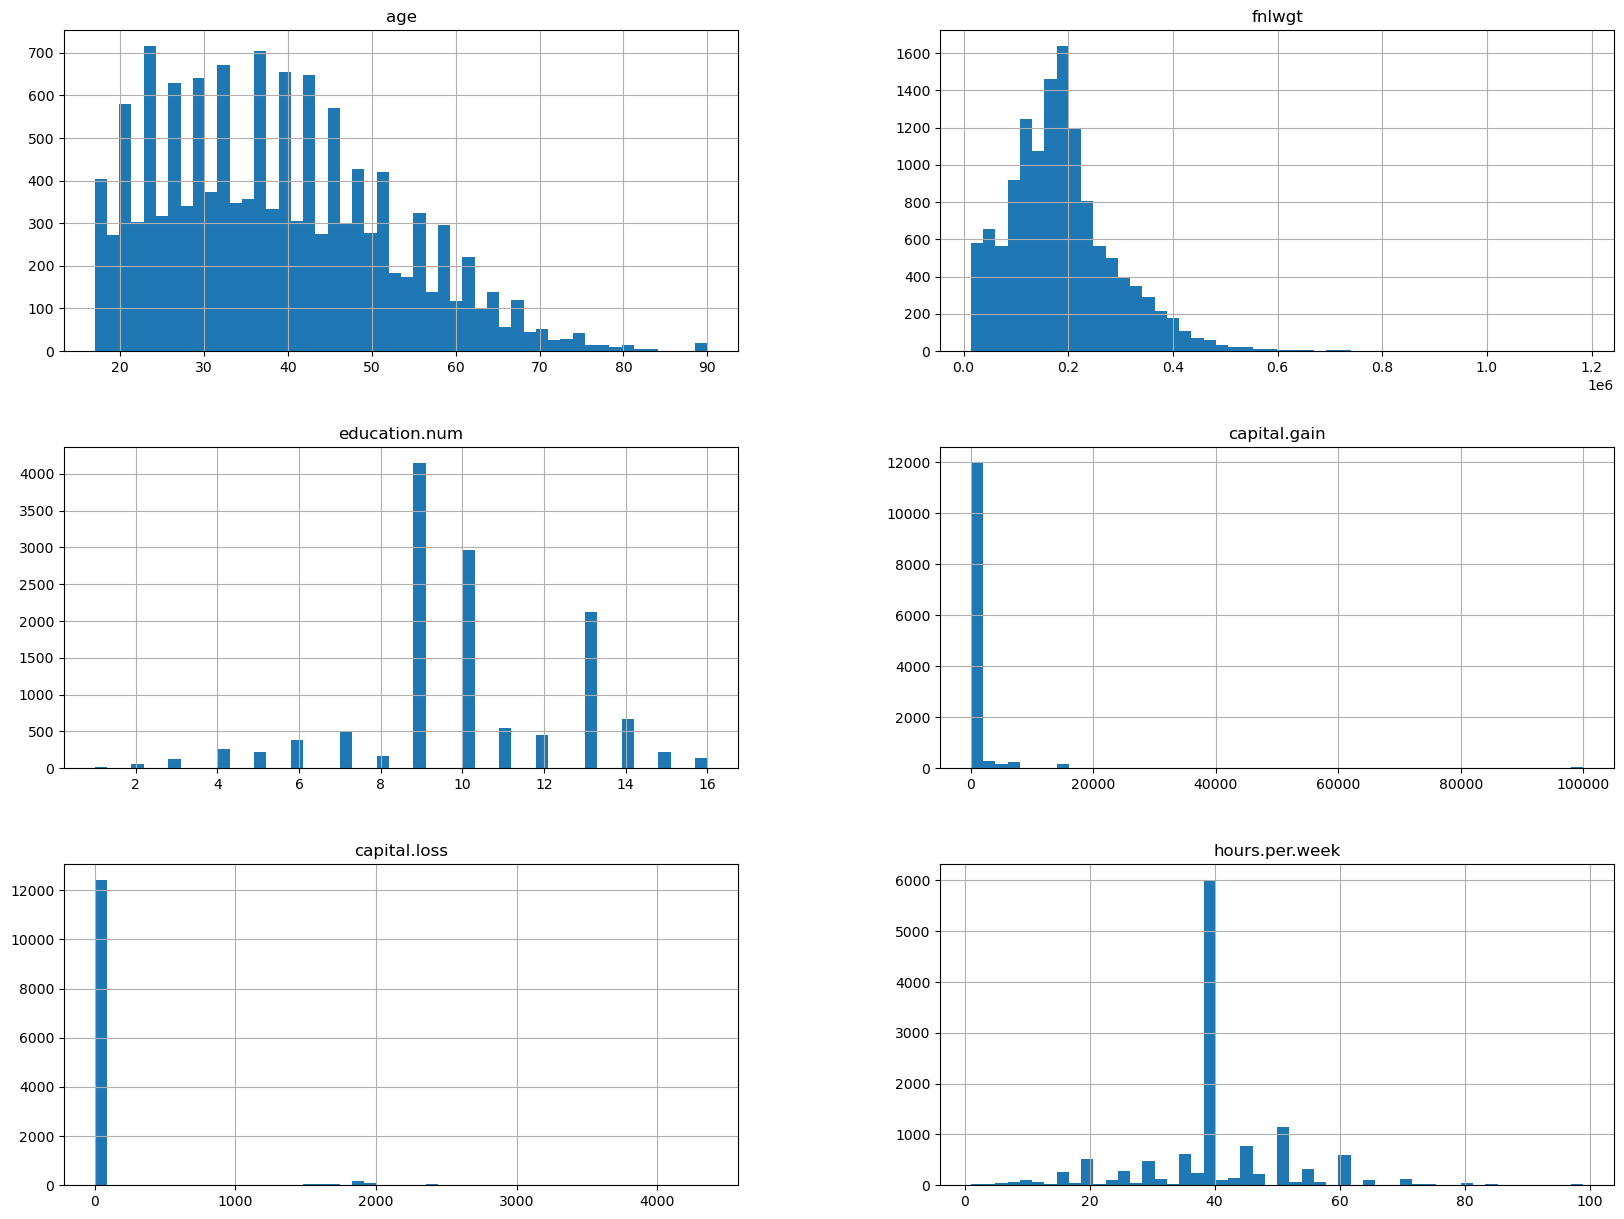

In [16]:
# from lecture 5
train_df.hist(bins=50, figsize=(20, 15));

<!-- END QUESTION -->
age,education and hours per week seems relevant for predicting predict whether income exceeds 50K per year or not. Age seems to follow a non normal distribution with peaks around certain age, these peaks might be related to wage like if people chose to quit their jobs around certain cut off age if their wage didn't reach x amount. Education also have some variables having a lot more counts than others that might be related to wages. Perhaps is most people are e education, exceeding that education level can make you earn more than 50k. Hours per week have one peak that is a working time that a lot people chose, as we know most jobs are paid based on the time you work so this is an important feature on predicting wage as well.
<br><br>

<!-- BEGIN QUESTION -->

### 2.3 Identify transformations to apply
rubric={points:13}

Before passing this data to a machine learning model, we need to apply some transformations on different features. Below we are providing possible transformations which can be applied on each column in `census_df`.  

**Your tasks:**
1. Write your justification or explanation for each row in the explanation column. An example explanation is given for the age column. 

> Note: This question is a bit open-ended. If you do not agree with the provided transformation, feel free to argue your case in the explanation. That said, in this assignment, go with the transformations provided below. 

<div class="alert alert-warning">

Solution_2.3
    
</div>

| Feature | Transformation | Explanation
| --- | ----------- | ----- |
| age | scaling | A numeric feature with no missing values. Good idea to apply scaling, as the range of values (17 to 90) is quite different compared to other numeric features.|
| workclass | imputation, one-hot encoding | A categorical feature with missing value. Imputation can be applied to fill missing value by mean or medium. After that, one-hot encoding allow transformation into binary outcomes which allow model to perform classification on it.|
| fnlwgt | drop | based on comment info about this dataset, this column is only a weight produced when creating concensus data, it is not relevant to our prediction goal. |
| education | ordinal encoding | original encoding allows conversion of education's categorical feature into numeric while preserving its level differences between each education level (e.g. 10th<11th) |
| education.num | drop | This colomn is dropped primarily due to its repetitiveness with education column. It is not as relevent as education column as education colomn might also capture credential premium and education.num does not directly translate into education level (e.g.some people finish collage in 3 years) |
| marital.status | one-hot encoding  |  Can use one-hot encoding to transform the categorical feature into  binary columns |
| occupation | imputation, one-hot encoding  |have missing values, imputation used to fill in the missing values with a strategy (e.g. medium). One-hot encoding applied to convert the categorical values into binary columns, allow model to understand and make predictions on target. |
| relationship | one-hot encoding  | Relationship is a categorical feature. One-hot encoding can be applied to convert the categorical values into  binary columns, allowing the model to capture the relationship between each relationship category and the target.|
| race | drop  | This is probably dropped due to no racism assumption. However I think we should keep it because many studies found that race do have an effect on wage (e.g.name discrimination study). We should do one-hot encoding if we decided not to drop it. |
| sex | one-hot encoding with "binary=True" | Sex feature is a categorical variable representing the binary gender of an individual collected in this dataset. One-hot encoding with "binary=True" can be used to convert the categorical values into a single binary column (e.g., 1 for male, 0 for female), allowing the model to differentiate wage outcomes (weither it exceed target in our case) for the two genders.|
| capital.gain | scaling | This is a numeric feature. We apply scaling to it so the model does not weight this feature too heavily or lightly that it is treted on compairable scale with other predictors. Most Capital gains are around 0 but some can be really large which would greatly undermine model's predictive ability if not scales. | 
| capital.loss | scaling | This is a numeric feature. We apply scaling to it so the model to normalize the range of values so the model treats it on a similar scale during the learning process. Most Capital loss are around 0 but some can be really large around 200 which would greatly undermine model's predictive ability if not scales.|
| hours.per.week | scaling | This is a numeric feature. Because most capital gain and loss is around 0  but hours.per.week is around 40, so for cases where capital gain/ loss is around 0 40 in work would heavily influence out model's outcome without scaling. |
| native.country | imputation, one-hot encoding | This feature have missing values. In order to handle it we can fill missing values with most frequent country of origion. However I dont agree with this imputation because this would shift the underlying demographic of our model and would not be representitive of real ratio in reality which might lower model's predictive ability. One hot encoding create new binary colomns to represent country categories.  | 


_Points:_ 13

['workclass', 'occupation', 'native.country']

<!-- END QUESTION -->

<br><br>

### 2.4 Identify feature types 
rubric={autograde:5}


**Your tasks:**
1. Based on the types of transformations you want to apply on the features, identify different feature types and store them in the variables below as lists.  

<div class="alert alert-warning">
    
Solution_2.4
    
</div>

_Points:_ 5

In [17]:
# Fill in the lists below.
numeric_features = ['age', 'capital.gain', 'capital.loss', 'hours.per.week']
categorical_features = ['workclass', 'occupation', 'marital.status', 'relationship', 'native.country']
ordinal_features = ['education']
binary_features = ['sex']
drop_features = ['fnlwgt', 'education.num', 'race']
target = "income"

In [18]:
# Sorting all the lists above for the autograder
numeric_features.sort()
categorical_features.sort()
ordinal_features.sort()
binary_features.sort()
drop_features.sort()

In [19]:
grader.check("q2.4")

q2.4 results: All test cases passed!

<br><br><br><br>

## Exercise 3: Baseline models 

### 3.1 Separating feature vectors and targets  
rubric={autograde:2}

**Your tasks:**

1. Create `X_train`, `y_train`, `X_test`, `y_test` from `train_df` and `test_df`. 

<div class="alert alert-warning">
    
Solution_3.1
    
</div>

_Points:_ 2

In [20]:
X_train = train_df.drop(columns=['income'])
y_train = train_df['income']
X_test = test_df.drop(columns=['income'])
y_test = test_df['income']

display(X_train)
display(y_train)
display(X_test)
display(y_test)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
5917,26,Private,214303,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States
32065,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States
28237,27,Private,202206,11th,7,Separated,Farming-fishing,Other-relative,White,Male,0,0,40,Puerto-Rico
12846,49,Private,151584,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
25706,19,Private,351802,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,35,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,48,Private,70668,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,50,United-States
17730,35,Private,340018,10th,6,Never-married,Other-service,Unmarried,Black,Female,0,0,38,United-States
28030,26,Private,373553,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,42,United-States
15725,28,Private,155621,5th-6th,3,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Columbia


5917     <=50K
32065    <=50K
28237    <=50K
12846     >50K
25706    <=50K
         ...  
28636    <=50K
17730    <=50K
28030    <=50K
15725    <=50K
19966    <=50K
Name: income, Length: 13024, dtype: object

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
20713,40,Self-emp-not-inc,240698,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States
13495,36,Federal-gov,184556,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
12367,27,Local-gov,273929,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States
22402,61,Self-emp-not-inc,224784,Assoc-acdm,12,Married-spouse-absent,Exec-managerial,Not-in-family,White,Female,0,0,90,United-States
18338,25,Private,306513,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,45,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21241,45,Private,160724,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Vietnam
15249,34,Private,152453,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Guatemala
29355,40,Private,242521,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
19775,36,Self-emp-not-inc,202950,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,Iran


20713    <=50K
13495    <=50K
12367    <=50K
22402    <=50K
18338    <=50K
         ...  
21241    <=50K
15249    <=50K
29355     >50K
19775    <=50K
24495    <=50K
Name: income, Length: 19537, dtype: object

In [21]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<br><br>

### 3.2 Dummy classifier
rubric={autograde:2}

**Your tasks:**

1. Carry out 5-fold cross-validation using `scikit-learn`'s `cross_validate` function with `return_train_scores=True` and store the results as a dataframe named `dummy_df` where each row corresponds to the results from a cross-validation fold. 

<div class="alert alert-warning">
    
Solution_3.2
    
</div>

_Points:_ 2

In [22]:
dummy_df = pd.DataFrame(cross_validate(DummyClassifier(strategy="most_frequent"), X_train, y_train,cv=5, return_train_score=True)) 
print(dummy_df)

   fit_time  score_time  test_score  train_score
0  0.006983    0.004985    0.758157     0.758230
1  0.004987    0.003989    0.758157     0.758230
2  0.005020    0.003991    0.758157     0.758230
3  0.004987    0.004988    0.758157     0.758230
4  0.005985    0.003985    0.758449     0.758157


In [23]:
grader.check("q3.2")

q3.2 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.3 Discussion
rubric={points:2}

**Your tasks:**

1. Hopefully, you were able to run cross-validation with dummy classifier successfully in the question above. At this point, if you train [`sklearn`'s `SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model on `X_train` and `y_train` would it work? Why or why not? 

<div class="alert alert-warning">
    
Solution_3.3
    
</div>

_Points:_ 2

If we train sklearn's SVC model on X_train and y_train after we did cross-validation with dummy classifier X_train dataset still contains categorical features with missing values, it would not work. We would get an error message because the SVC model expects numerical inut without missing values. We should preprocess the data, do transformations (scaling, drop,encoding) to handle missing values and categorical variables before we continue.

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 4: Preprocessing
<hr>

In this dataset, we have different types of features: numeric features, an ordinal feature, categorical features, and a binary feature. We want to apply different transformations on different columns and therefore we need a column transformer. In this exercise, first, we'll define different transformations on different types of features and then will create a `scikit-learn`'s `ColumnTransformer`. For example, the code below creates a `numeric_transformer` for numeric features. 

In [24]:
numeric_transformer = StandardScaler()
numeric_transformer

StandardScaler()

In the exercises below, you'll create transformers for other types of features. 

<br><br>

### 4.1 Preprocessing ordinal features
rubric={autograde:5}

**Your tasks:**

1. Create a transformer called `ordinal_transformer` for our ordinal features. 

<div class="alert alert-warning">
    
Solution_4.1
    
</div>

_Points:_ 5

In [25]:
education_levels = [
    "Preschool",
    "1st-4th",
    "5th-6th",
    "7th-8th",
    "9th",
    "10th",
    "11th",
    "12th",
    "HS-grad",
    "Prof-school",
    "Assoc-voc",
    "Assoc-acdm",
    "Some-college",
    "Bachelors",
    "Masters",
    "Doctorate",
]
ordinal_transformer = OrdinalEncoder(
    dtype=int,
    categories=[education_levels])
ordinal_transformer

OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                            '10th', '11th', '12th', 'HS-grad', 'Prof-school',
                            'Assoc-voc', 'Assoc-acdm', 'Some-college',
                            'Bachelors', 'Masters', 'Doctorate']],
               dtype=<class 'int'>)

In [26]:
grader.check("q4.1")

q4.1 results: All test cases passed!

<br><br>

### 4.2 Preprocessing binary features
rubric={autograde:2}

**Your tasks:**

1. Create a transformer called `binary_transformer` for our binary features.

> _Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

<div class="alert alert-warning">
    
Solution_4.2
    
</div>

_Points:_ 2

In [27]:
binary_transformer = OneHotEncoder(drop="if_binary", dtype=int)
binary_transformer

OneHotEncoder(drop='if_binary', dtype=<class 'int'>)

In [28]:
grader.check("q4.2")

q4.2 results: All test cases passed!

<br><br>

### 4.3 Preprocessing categorical features
rubric={autograde:4}

In Exercise 2.3, we saw that there are 3 categorical features with missing values. So first we need to impute the missing values and then encode these features with one-hot encoding. For the purpose of this assignment, let's just have imputation as the first step for all categorical features even when they do not have missing values. This should be OK because if a feature doesn't have any missing value,  imputation won't be applied. 

If we want to apply more than one transformation on a set of features, we need to create a [`scikit-learn` `Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). For example, for categorical features we can create a `scikit-learn` `Pipeline` with first step as imputation and the second step as one-hot encoding. 

**Your tasks:**

1. Create a `sklearn` `Pipeline` using [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) called `categorical_transformer` for our categorical features with two steps: `SimpleImputer` for imputation with `strategy="constant"` and `fill_value="missing"` and `OneHotEncoder` with `handle_unknown="ignore"` and `sparse=False` for one-hot encoding. 

<div class="alert alert-warning">
    
Solution_4.3
    
</div>

_Points:_ 4

In [29]:
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)
categorical_transformer

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [30]:
grader.check("q4.3")

q4.3 results: All test cases passed!

<br><br>

### 4.4 Creating a column transformer. 
rubric={autograde:7}

**Your tasks:**
1. Create a `sklearn` `ColumnTransformer` named `preprocessor` using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) with the transformers defined in the previous exercises. Use the sequence below in the column transformer and add a "drop" step for the `drop_features` in the end.  
    - `numeric_transformer`
    - `ordinal_transformer`
    - `binary_transformer`
    - `categorical_transformer`
2. Transform the data by calling `fit_transform` on the training set and save it as a dataframe in a variable called `transformed_df`. How many new columns have been created in the preprocessed data in comparison to the original `X_train`? Store the difference between the number of columns in `transformed_df` and `X_train` in a variable called `n_new_cols`. 

<div class="alert alert-warning">
    
Solution_4.4
    
</div>

_Points:_ 7

In [31]:
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer, ordinal_features),    
    (binary_transformer, binary_features),    
    (categorical_transformer, categorical_features),
    ("drop", drop_features),
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'capital.gain', 'capital.loss',
                                  'hours.per.week']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Preschool',
                                                             '1st-4th',
                                                             '5th-6th',
                                                             '7th-8th', '9th',
                                                             '10th', '11th',
                                                             '12th', 'HS-grad',
                                                             'Prof-school',
                                                             'Assoc-voc',
                                                             'Assoc-acdm',
                                                             'Some-college',
                                                             'Bachelors',
                                                             'Masters',
                                                             'Doctorate']],
                                                dtype=<class...
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['sex']),
                                ('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['marital.status', 'native.country',
                                  'occupation', 'relationship', 'workclass']),
                                ('drop', 'drop',
                                 ['education.num', 'fnlwgt', 'race'])])

In [32]:
transformed_df = preprocessor.fit_transform(X_train, y_train)
display(transformed_df)
n_new_cols = transformed_df.shape[1] - X_train.shape[1]
print(n_new_cols)

array([[-0.92190947, -0.14748266, -0.21474155, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43624842, -0.14748266, -0.21474155, ...,  0.        ,
         0.        ,  0.        ],
       [-0.84843247, -0.14748266, -0.21474155, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.92190947, -0.14748266, -0.21474155, ...,  0.        ,
         0.        ,  0.        ],
       [-0.77495548, -0.14748266, -0.21474155, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10676843, -0.14748266, -0.21474155, ...,  0.        ,
         0.        ,  0.        ]])

70


In [33]:
grader.check("q4.4")

q4.4 results: All test cases passed!

<br><br><br><br>

## Exercise 5: Building models 

Now that we have preprocessed features, we are ready to build models. Below, I'm providing the function we used in class which returns mean cross-validation score along with standard deviation for a given model. Use it to keep track of your results. 

In [34]:
results_dict = {}  # dictionary to store all the results

In [35]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

Below I'm showing an example where I call `mean_std_cross_val_scores` with `DummyClassifier`. The function calls `cross_validate` with the passed arguments and returns a series with mean cross-validation results and std of cross-validation. When you train new models, you can just add the results of these models in `results_dict`, which can be easily converted to a dataframe so that you can have a table with all your results. 

In [36]:
# Baseline model

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(random_state = 123)
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.039 (+/- 0.001),0.017 (+/- 0.000),0.758 (+/- 0.000),0.758 (+/- 0.000)


<br><br>

<!-- BEGIN QUESTION -->

### 5.1 Trying different classifiers
rubric={points:10}

**Your tasks:**

1. For each of the models in the starter code below: 
    - Define a pipeline with two steps: `preprocessor` from 4.4 and the model as your classifier. 
    - Carry out 5-fold cross-validation with the pipeline and get the mean cross-validation scores with std by calling the `mean_std_cross_val_scores` function above. 
    - Store the results in a dataframe called `income_pred_results_df` with the model names in the `models` dictionary below as the index and each row representing results returned by `mean_std_cross_val_scores` function above. In other words, `income_pred_results_df` should look similar to the `results_df` dataframe above with more rows for the models below. 
    
> This might take a while to run. Be patient! 

In [37]:
models = {
    "decision tree": DecisionTreeClassifier(random_state=123),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=123),
}

<div class="alert alert-warning">
    
Solution_5.1
    
</div>

_Points:_ 10

In [38]:
#code from lecture 5
for m_name,m in models.items():
    pipe = make_pipeline(preprocessor, m)
    results_dict[m_name] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv = 5, return_train_score=True
)

In [39]:
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
dummy,0.039 (+/- 0.001),0.017 (+/- 0.000),0.758 (+/- 0.000),0.758 (+/- 0.000)
decision tree,0.111 (+/- 0.012),0.015 (+/- 0.001),0.814 (+/- 0.012),0.987 (+/- 0.001)
kNN,0.040 (+/- 0.004),0.164 (+/- 0.040),0.836 (+/- 0.008),0.883 (+/- 0.002)
RBF SVM,3.122 (+/- 0.112),1.308 (+/- 0.023),0.852 (+/- 0.005),0.855 (+/- 0.002)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 5.2 Discussion 
rubric={points:5}

**Your tasks:**

1. Examine the train and validation accuracies and `fit` and `score` times for all the models in the results above. How do the validation accuracies compare to the `DummyClassifier` model? Which model has the best validation accuracy? Which model is the fastest one? Which model is overfitting the most and the least?  


<div class="alert alert-warning">
    
Solution_5.2
    
</div>

_Points:_ 5

After examineing the train and validation accuracies and fit and score times for all the models in the results above I found that DummyClassifier model has a validation accuracy of approximately 0.758 but decision tree model 0.814, kNN model 0.836 and  RBF SVM model 0.852. This reflects that all these models have better performance (higher validation accuracy) than  Dummy Classifier, indicating that the models perform well on unseen data. RBF SVM model is the best among them with 0.852 validation accuracy . kNN model had the fastest fit time of 0.040.Decision tree model seems to be overfitting the most by calculating the  test and train score diff: 0.814. RBF SVM model  seems to be least overfitting by a difference of training and testing score of 0.852.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 5.3 Hyperparameter optimization
rubric={points:10}

In this exercise, you'll carry out hyperparameter optimization for the hyperparameter `C` of SVC RBF classifier. In practice, you'll carry out hyperparameter optimization for all different hyperparameters of the most promising classifiers. For the purpose of this assignment, we'll only do it for the `SVC` classifier with one hyperparameter, namely `C`. 

**Your tasks:**

1. For each `C` value in the `param_grid` below: 
    - Create a pipeline object with two steps: preprocessor from 4.4 and `SVC` classifier with the `C` value.
    - Carry out 5-fold cross validation with the pipeline.  
    - Store the results in `results_dict` and display results as a pandas DataFrame. 
2. Which hyperparameter value seems to be performing the best? Store it in a variable called `best_C`. (Since this question is not autograded, please store the value directly as a number, something like `best_C = 0.001`, if `C = 0.001` is giving you the best CV score.) Is it different than the default value for the hyperparameter used by `scikit-learn`? 

> Note: Running this will take a while. Please be patient. 

In [40]:
param_grid = {"C": np.logspace(-1, 2, 4)}
param_grid

{'C': array([  0.1,   1. ,  10. , 100. ])}

<div class="alert alert-warning">
    
Solution_5.3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [41]:
for p in param_grid["C"]:
    pipeline = make_pipeline(preprocessor, SVC(C=p))
    results_dict[f"C={p}"] = mean_std_cross_val_scores(pipeline, X_train, y_train, cv=5, return_train_score=True)
# from lecture 8

In [42]:
results_df = pd.DataFrame(results_dict).T

results_df

,fit_time,score_time,test_score,train_score
dummy,0.039 (+/- 0.001),0.017 (+/- 0.000),0.758 (+/- 0.000),0.758 (+/- 0.000)
decision tree,0.111 (+/- 0.012),0.015 (+/- 0.001),0.814 (+/- 0.012),0.987 (+/- 0.001)
kNN,0.040 (+/- 0.004),0.164 (+/- 0.040),0.836 (+/- 0.008),0.883 (+/- 0.002)
RBF SVM,3.122 (+/- 0.112),1.308 (+/- 0.023),0.852 (+/- 0.005),0.855 (+/- 0.002)
C=0.1,3.580 (+/- 0.160),1.534 (+/- 0.010),0.838 (+/- 0.006),0.838 (+/- 0.002)
C=1.0,2.988 (+/- 0.040),1.300 (+/- 0.018),0.852 (+/- 0.005),0.855 (+/- 0.002)
C=10.0,3.094 (+/- 0.145),1.178 (+/- 0.012),0.858 (+/- 0.005),0.862 (+/- 0.002)
C=100.0,4.206 (+/- 0.064),1.143 (+/- 0.014),0.860 (+/- 0.006),0.871 (+/- 0.002)


In [43]:
best_C = 100

<!-- END QUESTION -->
C = 100 seems to be the best because it has hightest test score and train score.The default value for the C hyperparameter in scikit-learn's SVC is 1.0 which is different from our best C value.
<br><br><br><br>

## Exercise 6: Evaluating on the test set 
<hr>

Now that we have a best performing model, it's time to assess our model on the set aside test set. In this exercise, you'll examine whether the results you obtained using cross-validation on the train set are consistent with the results on the test set. 

### 6.1 Scoring on the unseen test set 
rubric={autograde:4}

**Your tasks:**

1. Create a pipeline named `final_pipeline` with the preprocessor from 4.4 as the first step and the best performing SVC model from 5.4 as the second step. 
2. Train the pipeline on the entire training set `X_train` and `y_train`. 
3. Score the pipeline on `X_test` and `y_test` and store the score in a variable called `test_score`.  

<div class="alert alert-warning">
    
Solution_6.1
    
</div>

_Points:_ 4

_Type your answer here, replacing this text._

In [44]:
final_pipeline = make_pipeline(preprocessor, SVC(C=100))
final_pipeline.fit(X_train, y_train)
test_score = final_pipeline.score(X_test, y_test)

print(test_score)

0.8497722270563546


In [45]:
grader.check("q6.1")

q6.1 results: All test cases passed!

<br><br><br><br>

## Exercise 7: Short answer questions

<!-- BEGIN QUESTION -->

### 7.1 kNNs toy example
rubric={points:3}

Suppose you want to get predictions using the $k$-nearest neighbour algorithm on the toy dataset below. 

$$ X = \begin{bmatrix}5 & 2\\4 & -2\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}0\\0\\1\\1\\1\\2\end{bmatrix}.$$

Suppose you are given a new data point $x=\begin{bmatrix} 0\\0\end{bmatrix}$.  

1. What would the model predict when $k=1$?
2. What would the model predict when $k=3$?
3. What would the model predict when $k=3$ if we were doing regression rather than classification? 

_Points:_ 3

1. model predict (0,0) based on 1 nearest neighbour which is (4,-2), it's y will be predicting outcome of (0,0) which is 0.
2. model predict (0,0) based on 3 nearest neighbour which is (4,-2),(2,2),(5,2) their y are [0,0,1] predicted outcome of (0,0) will me mode of these which is 0.
3. is we are doing regression, average will be calculated (0+0+1)/3 = 1/3 will be predicted for x.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 7.2 Preprocessing
rubric={points:8}

1. What is the problem with calling `fit_transform` on your test data with `StandardScaler`?
2. Why is it important to follow the Golden Rule? If you violate it, will that give you a worse classifier?
3. What are two advantages of using sklearn Pipelines? 
4. When is it appropriate to use sklearn `ColumnTransformer`? 

_Points:_ 8

_Type your answer here, replacing this text._

<!-- END QUESTION -->
1. The problem with calling fit_transform on test data with StandardScaler is data leakage, this violated the golden rule because we are now using information from the test data to scale the test data.
2. We should follow golden rule and never use test data during training because we want an accurate reflection of our model's accuracy and performance on real world data (unseen data like those in test set). We can end up with worse classifier because we can overfit the model now that it have access to not only train but also test.
3. Sklearn Pipelines allow us to avoid contamination of our data (i.e. breaking golden rule)during preprocessing and fitting. It also allows us to work in a neater format that is faster and with more clearity.
4. It is appropriate to use sklearn ColumnTransformerhen you are dealing with different datatypes that need to undergo preprocessing and you need to apply different transformations to different colomns enorder for it to be appropriate for model training.
<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 

Congratulations on finishing the homework! This was a tricky one but I hope you are feeling good after working on it. You are now ready to build a simple supervised machine learning pipeline on real-world datasets! Well done :clap:! 

![](img/eva-well-done.png)

